<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/Lab6-LR_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Import the required modules, numpy for calculation, and Matplotlib for drawing
import numpy as np 
import matplotlib.pyplot as plt 
import csv
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

In [6]:
y, x=[], []
with open('Salary.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",") #list of dics
    for row in reader:
      x += [float(row['x'])]
      y += [int(float(row['y']))]

x=np.array(x)
y=np.array(y)

 


In [7]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is ax+ b
def model(a, b, x): 
  return a*x + b
#The most commonly used loss function of linear regression model is the loss function of mean variance difference 
def loss_function(a, b, x, y): 
  num = len(x) 
  #print(f"befor model fn {a}") 
  prediction=model(a,b,x) 
  #print(f"after model fn {a}") 
  return (0.5/num) * (np.square(prediction-y)).sum()
#The optimization function mainly USES partial derivatives to update two parameters a and b 
global daList
daList = []
def optimize(a,b,x,y): 
  num = len(x) 
  prediction = model(a,b,x) 
  #Update the values of A and B by finding the partial derivatives of the loss function on a and b 
  da = (1.0/num) * ((prediction -y)*x).sum() 
  daList.append(-da)
  db = (1.0/num) * ((prediction -y).sum())

  
  plt.show()
  #print(f"befor equation fn {a}") 
  a = a -Lr*da 
  #print(f"after equation fn {a}") 
  b = b -Lr*db 
 
  return a, b
#iterated function, return a and b 
def iterate(a,b,x,y,times): 
  for i in range(0,times):
    #print(f"befor optmize fn {a}") 
    a,b = optimize(a,b,x,y)
   # print(f"after optmize fn {a}") 
  #  print(a) 
  
  return a, b 

In [10]:

#Initialize parameters and display 
a = np.random.rand(1)
#print(a) 
b = np.random.rand(1) 
#print(b) 
Lr = 0.0001

a,b = iterate(a,b,x,y,1200) 
prediction=model(a,b,x) 
loss = loss_function(a, b, x, y) 


In [16]:
model = Sequential()
model.add(Dense(1, input_dim=1,activation='linear'))
# 1 --> nimber of nerons 

model.compile(loss='mse',optimizer='sgd',metrics='mae') 
# sgd : stocatic gradiant 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
result = model.fit(x,y,batch_size=8,epochs=100,verbose=1) 
# epoch = itirations on data

# defult batch size = 32 ================================== mini batch
# output 4/4 which means update done 4 times (30/8) ======= mini batch

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 140862272.0000 - mae: 9741.4199
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 132523448.0000 - mae: 9272.2441
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 130843896.0000 - mae: 9226.7686
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 132008392.0000 - mae: 9237.4648
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 123006640.0000 - mae: 8772.5752
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 117713920.0000 - mae: 8712.2402
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 124719592.0000 - mae: 9208.8945
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 114362536.0000 - mae: 8637.9473
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 113969152.0000 - mae: 8495.8154
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 1

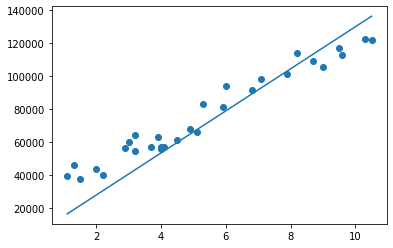

In [23]:
plt.scatter(x,y)
plt.plot(x,prediction)
plt.show()

In [21]:
model.save('Model_1.h5')